In [1]:
# Loading the packages to perform data mungling
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


%matplotlib inline

## Load dataset into Dataframe

In [2]:
df = pd.read_csv('Train_Validate.csv')
df.head()

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
0,65438,Sales & Marketing,region_7,Master's & above,f,sourcing,1,35,5.0,8,1,0,49,0
1,65141,Operations,region_22,Bachelor's,m,other,1,30,5.0,4,0,0,60,0
2,7513,Sales & Marketing,region_19,Bachelor's,m,sourcing,1,34,3.0,7,0,0,50,0
3,2542,Sales & Marketing,region_23,Bachelor's,m,other,2,39,1.0,10,0,0,50,0
4,48945,Technology,region_26,Bachelor's,m,other,1,45,3.0,2,0,0,73,0


## Exploratory Data Analysis(EDA)

#### Variable Description


* gender[Ordinal]
* age[ratio]
* no_of_trainings[ratio]
* department[Nominal]
* KPIs_met >80%[]
* region[Nominal]
* previous_year_rating[Ratio]
* awards_won?[Ratio]
* education[Ordinal]
* avg_training_score[Ratio]
* is_promoted[Nominal]
* recruitment_channel[Nominal]

#### Missing Value Detection

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54808 entries, 0 to 54807
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   employee_id           54808 non-null  int64  
 1   department            54808 non-null  object 
 2   region                54808 non-null  object 
 3   education             52399 non-null  object 
 4   gender                54808 non-null  object 
 5   recruitment_channel   54808 non-null  object 
 6   no_of_trainings       54808 non-null  int64  
 7   age                   54808 non-null  int64  
 8   previous_year_rating  50684 non-null  float64
 9   length_of_service     54808 non-null  int64  
 10  KPIs_met >80%         54808 non-null  int64  
 11  awards_won?           54808 non-null  int64  
 12  avg_training_score    54808 non-null  int64  
 13  is_promoted           54808 non-null  int64  
dtypes: float64(1), int64(8), object(5)
memory usage: 5.9+ MB


In [4]:
# Using the .describe() to get a more descriptive statistics about the data.
df.describe()

,employee_id,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
count,54808.000000,54808.000000,54808.000000,50684.000000,54808.000000,54808.000000,54808.000000,54808.000000,54808.000000
mean,39195.830627,1.253011,34.803915,3.329256,5.865512,0.351974,0.023172,63.386750,0.085170
std,22586.581449,0.609264,7.660169,1.259993,4.265094,0.477590,0.150450,13.371559,0.279137
min,1.000000,1.000000,20.000000,1.000000,1.000000,0.000000,0.000000,39.000000,0.000000
25%,19669.750000,1.000000,29.000000,3.000000,3.000000,0.000000,0.000000,51.000000,0.000000
50%,39225.500000,1.000000,33.000000,3.000000,5.000000,0.000000,0.000000,60.000000,0.000000
75%,58730.500000,1.000000,39.000000,4.000000,7.000000,1.000000,0.000000,76.000000,0.000000
max,78298.000000,10.000000,60.000000,5.000000,37.000000,1.000000,1.000000,99.000000,1.000000


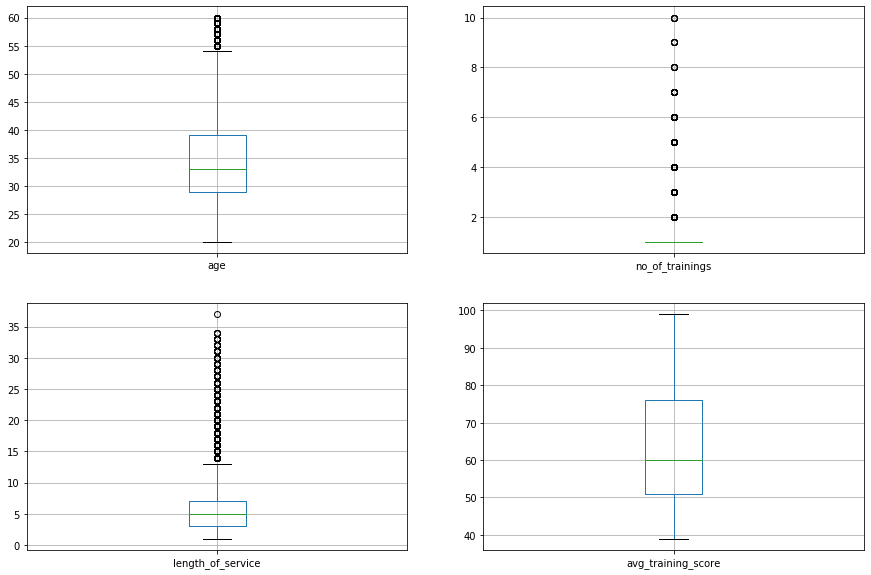

In [30]:
# Creating a boxplot to check if there are any outliers
plt.figure(figsize=(15,10))
for i, col in enumerate(['age', 'no_of_trainings', 'length_of_service', 'avg_training_score'], start=1):
    plt.subplot(2, 2, i)
    df.boxplot(col)

In [9]:
# Getting the missing data for each column
df.isnull().sum()

employee_id                0
department                 0
region                     0
education               2409
gender                     0
recruitment_channel        0
no_of_trainings            0
age                        0
previous_year_rating    4124
length_of_service          0
KPIs_met >80%              0
awards_won?                0
avg_training_score         0
is_promoted                0
dtype: int64

* From the description above, we could see that education and previous year rating are the only columns with missing/null values.

In [13]:
def nulls_breakdown(df=df):
    df_cols = list(df.columns)
    cols_total_count = len(list(df.columns))
    cols_count = 0
    for loc, col in enumerate(df_cols):
        null_count = df[col].isnull().sum()
        total_count = df[col].isnull().count()
        percent_null = round(null_count/total_count*100, 2)
        if null_count > 0:
            cols_count += 1
            print('[iloc = {}] {} has {} null values: {}% null'.format(loc, col, null_count, percent_null))
    cols_percent_null = round(cols_count/cols_total_count*100, 2)
    print('Out of {} total columns, {} contain null values.'.format(cols_total_count, cols_count))

In [14]:
nulls_breakdown()

[iloc = 3] education has 2409 null values: 4.4% null
[iloc = 8] previous_year_rating has 4124 null values: 7.52% null
Out of 14 total columns, 2 contain null values.


* Out of the 14 columns we have, it was only 2 columns that had null values. The null percent is not more than half of the dataset making the removal of the columns from the dataset not the right option. 
* To prevent any bias we will delete the rows that contain the null values.

#### Dealing with missing value

In [15]:
drop_null_row = df.dropna()
drop_null_row

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
0,65438,Sales & Marketing,region_7,Master's & above,f,sourcing,1,35,5.0,8,1,0,49,0
1,65141,Operations,region_22,Bachelor's,m,other,1,30,5.0,4,0,0,60,0
2,7513,Sales & Marketing,region_19,Bachelor's,m,sourcing,1,34,3.0,7,0,0,50,0
3,2542,Sales & Marketing,region_23,Bachelor's,m,other,2,39,1.0,10,0,0,50,0
4,48945,Technology,region_26,Bachelor's,m,other,1,45,3.0,2,0,0,73,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
54802,6915,Sales & Marketing,region_14,Bachelor's,m,other,2,31,1.0,2,0,0,49,0
54803,3030,Technology,region_14,Bachelor's,m,sourcing,1,48,3.0,17,0,0,78,0
54804,74592,Operations,region_27,Master's & above,f,other,1,37,2.0,6,0,0,56,0
54805,13918,Analytics,region_1,Bachelor's,m,other,1,27,5.0,3,1,0,79,0


In [16]:
drop_null_row.isnull().sum()

employee_id             0
department              0
region                  0
education               0
gender                  0
recruitment_channel     0
no_of_trainings         0
age                     0
previous_year_rating    0
length_of_service       0
KPIs_met >80%           0
awards_won?             0
avg_training_score      0
is_promoted             0
dtype: int64

In [18]:
nulls_breakdown(drop_null_row)

Out of 14 total columns, 0 contain null values.


* From the breakdown, we could see there are no missing data in our dataset now.

#### Outliers
* Outliers Detection
* By plotting a boxplot and histogram we could figure out the outliers in our continuous dataset.

In [19]:
# Create a function that we can re-use
def show_distribution(var_data):
    from matplotlib import pyplot as plt

    # Get statistics
    min_val = var_data.min()
    max_val = var_data.max()
    mean_val = var_data.mean()
    med_val = var_data.median()
    mod_val = var_data.mode()[0]

    print('Minimum:{:.2f}\nMean:{:.2f}\nMedian:{:.2f}\nMode:{:.2f}\nMaximum:{:.2f}\n'.format(min_val,
                                                                                            mean_val,
                                                                                            med_val,
                                                                                            mod_val,
                                                                                            max_val))

    # Create a figure for 2 subplots (2 rows, 1 column)
    fig, ax = plt.subplots(2, 1, figsize = (10,4))

    # Plot the histogram   
    ax[0].hist(var_data)
    ax[0].set_ylabel('Frequency')

    # Add lines for the mean, median, and mode
    ax[0].axvline(x=min_val, color = 'gray', linestyle='dashed', linewidth = 2)
    ax[0].axvline(x=mean_val, color = 'cyan', linestyle='dashed', linewidth = 2)
    ax[0].axvline(x=med_val, color = 'red', linestyle='dashed', linewidth = 2)
    ax[0].axvline(x=mod_val, color = 'yellow', linestyle='dashed', linewidth = 2)
    ax[0].axvline(x=max_val, color = 'gray', linestyle='dashed', linewidth = 2)

    # Plot the boxplot   
    ax[1].boxplot(var_data, vert=False)
    ax[1].set_xlabel('Value')

    # Add a title to the Figure
    fig.suptitle('Data Distribution')

    # Show the figure
    fig.show()



Minimum:20.00
Mean:35.59
Median:34.00
Mode:32.00
Maximum:60.00



C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:40: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.


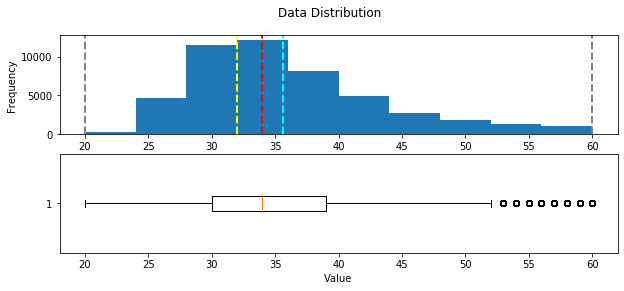

In [23]:
show_distribution(drop_null_row['age'])

Minimum:1.00
Mean:6.31
Median:5.00
Mode:3.00
Maximum:37.00



C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:40: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.


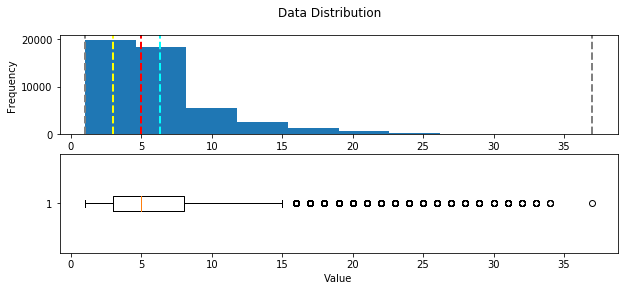

In [24]:
show_distribution(drop_null_row['length_of_service'])

Minimum:39.00
Mean:63.60
Median:60.00
Mode:50.00
Maximum:99.00



C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:40: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.


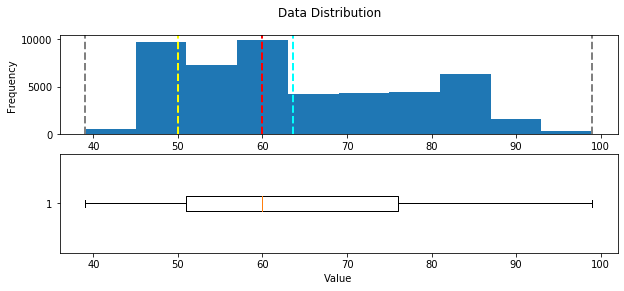

In [25]:
show_distribution(drop_null_row['avg_training_score'])

* 

### Data Exploration
* Univariate Analysis
* This refers to looking at the data for each feature on its own. This is generally done best by using histograms for continuous data, count/barplots for categorical data and of getting the descriptive statistics on them.


In [39]:
df1 = drop_null_row.copy()
df1.describe()

,employee_id,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
count,48660.000000,48660.000000,48660.000000,48660.000000,48660.00000,48660.000000,48660.00000,48660.000000,48660.000000
mean,39169.271681,1.251993,35.589437,3.337526,6.31157,0.356473,0.02314,63.603309,0.086971
std,22630.461554,0.604994,7.534571,1.257922,4.20476,0.478962,0.15035,13.273502,0.281795
min,1.000000,1.000000,20.000000,1.000000,1.00000,0.000000,0.00000,39.000000,0.000000
25%,19563.500000,1.000000,30.000000,3.000000,3.00000,0.000000,0.00000,51.000000,0.000000
50%,39154.000000,1.000000,34.000000,3.000000,5.00000,0.000000,0.00000,60.000000,0.000000
75%,58788.250000,1.000000,39.000000,4.000000,8.00000,1.000000,0.00000,76.000000,0.000000
max,78298.000000,10.000000,60.000000,5.000000,37.00000,1.000000,1.00000,99.000000,1.000000


In [35]:
df1.describe(include='all')

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
count,48660.000000,48660,48660,48660,48660,48660,48660.000000,48660.000000,48660.000000,48660.00000,48660.000000,48660.00000,48660.000000,48660.000000
unique,NaN,9,34,3,2,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,Sales & Marketing,region_2,Bachelor's,m,other,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,14239,10811,33404,33852,27017,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,39169.271681,NaN,NaN,NaN,NaN,NaN,1.251993,35.589437,3.337526,6.31157,0.356473,0.02314,63.603309,0.086971
std,22630.461554,NaN,NaN,NaN,NaN,NaN,0.604994,7.534571,1.257922,4.20476,0.478962,0.15035,13.273502,0.281795
min,1.000000,NaN,NaN,NaN,NaN,NaN,1.000000,20.000000,1.000000,1.00000,0.000000,0.00000,39.000000,0.000000
25%,19563.500000,NaN,NaN,NaN,NaN,NaN,1.000000,30.000000,3.000000,3.00000,0.000000,0.00000,51.000000,0.000000
50%,39154.000000,NaN,NaN,NaN,NaN,NaN,1.000000,34.000000,3.000000,5.00000,0.000000,0.00000,60.000000,0.000000
75%,58788.250000,NaN,NaN,NaN,NaN,NaN,1.000000,39.000000,4.000000,8.00000,1.000000,0.00000,76.000000,0.000000


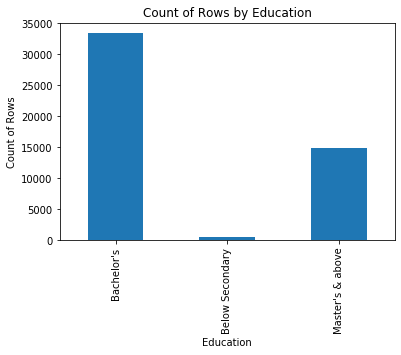

In [42]:
df1.education.value_counts().sort_index().plot(kind='bar')
plt.title('Count of Rows by Education')
plt.xlabel('Education')
plt.ylabel('Count of Rows')
plt.show()

* From the graph, we can confirm that Bachelor's has a high number of representation followed by Master's & above, then Below Secondary. 

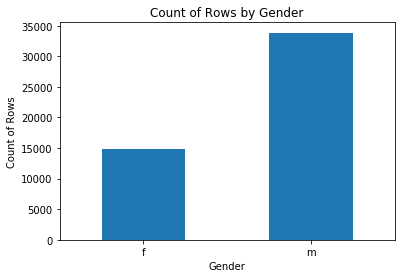

In [52]:
df1.gender.value_counts().sort_index().plot(kind='bar')
plt.title('Count of Rows by Gender')
plt.xlabel('Gender')
plt.ylabel('Count of Rows')
plt.xticks(rotation=0)
plt.show()

* This graph shows the high number of males compared to females in the dataset.

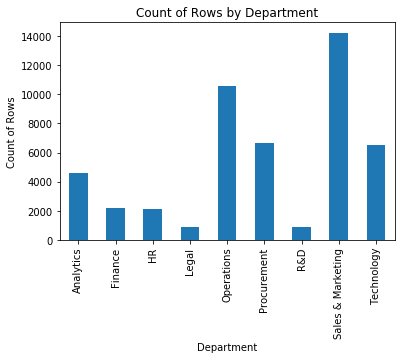

In [48]:
df1.department.value_counts().sort_index().plot(kind='bar')
plt.title('Count of Rows by Department')
plt.xlabel('Department')
plt.ylabel('Count of Rows')
#plt.xticks(rotation=360)
plt.show()

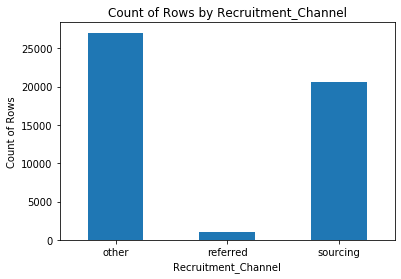

In [51]:
df1.recruitment_channel.value_counts().sort_index().plot(kind='bar')
plt.title('Count of Rows by Recruitment_Channel')
plt.xlabel('Recruitment_Channel')
plt.ylabel('Count of Rows')
plt.xticks(rotation=0)
plt.show()

#### Visual Distribution

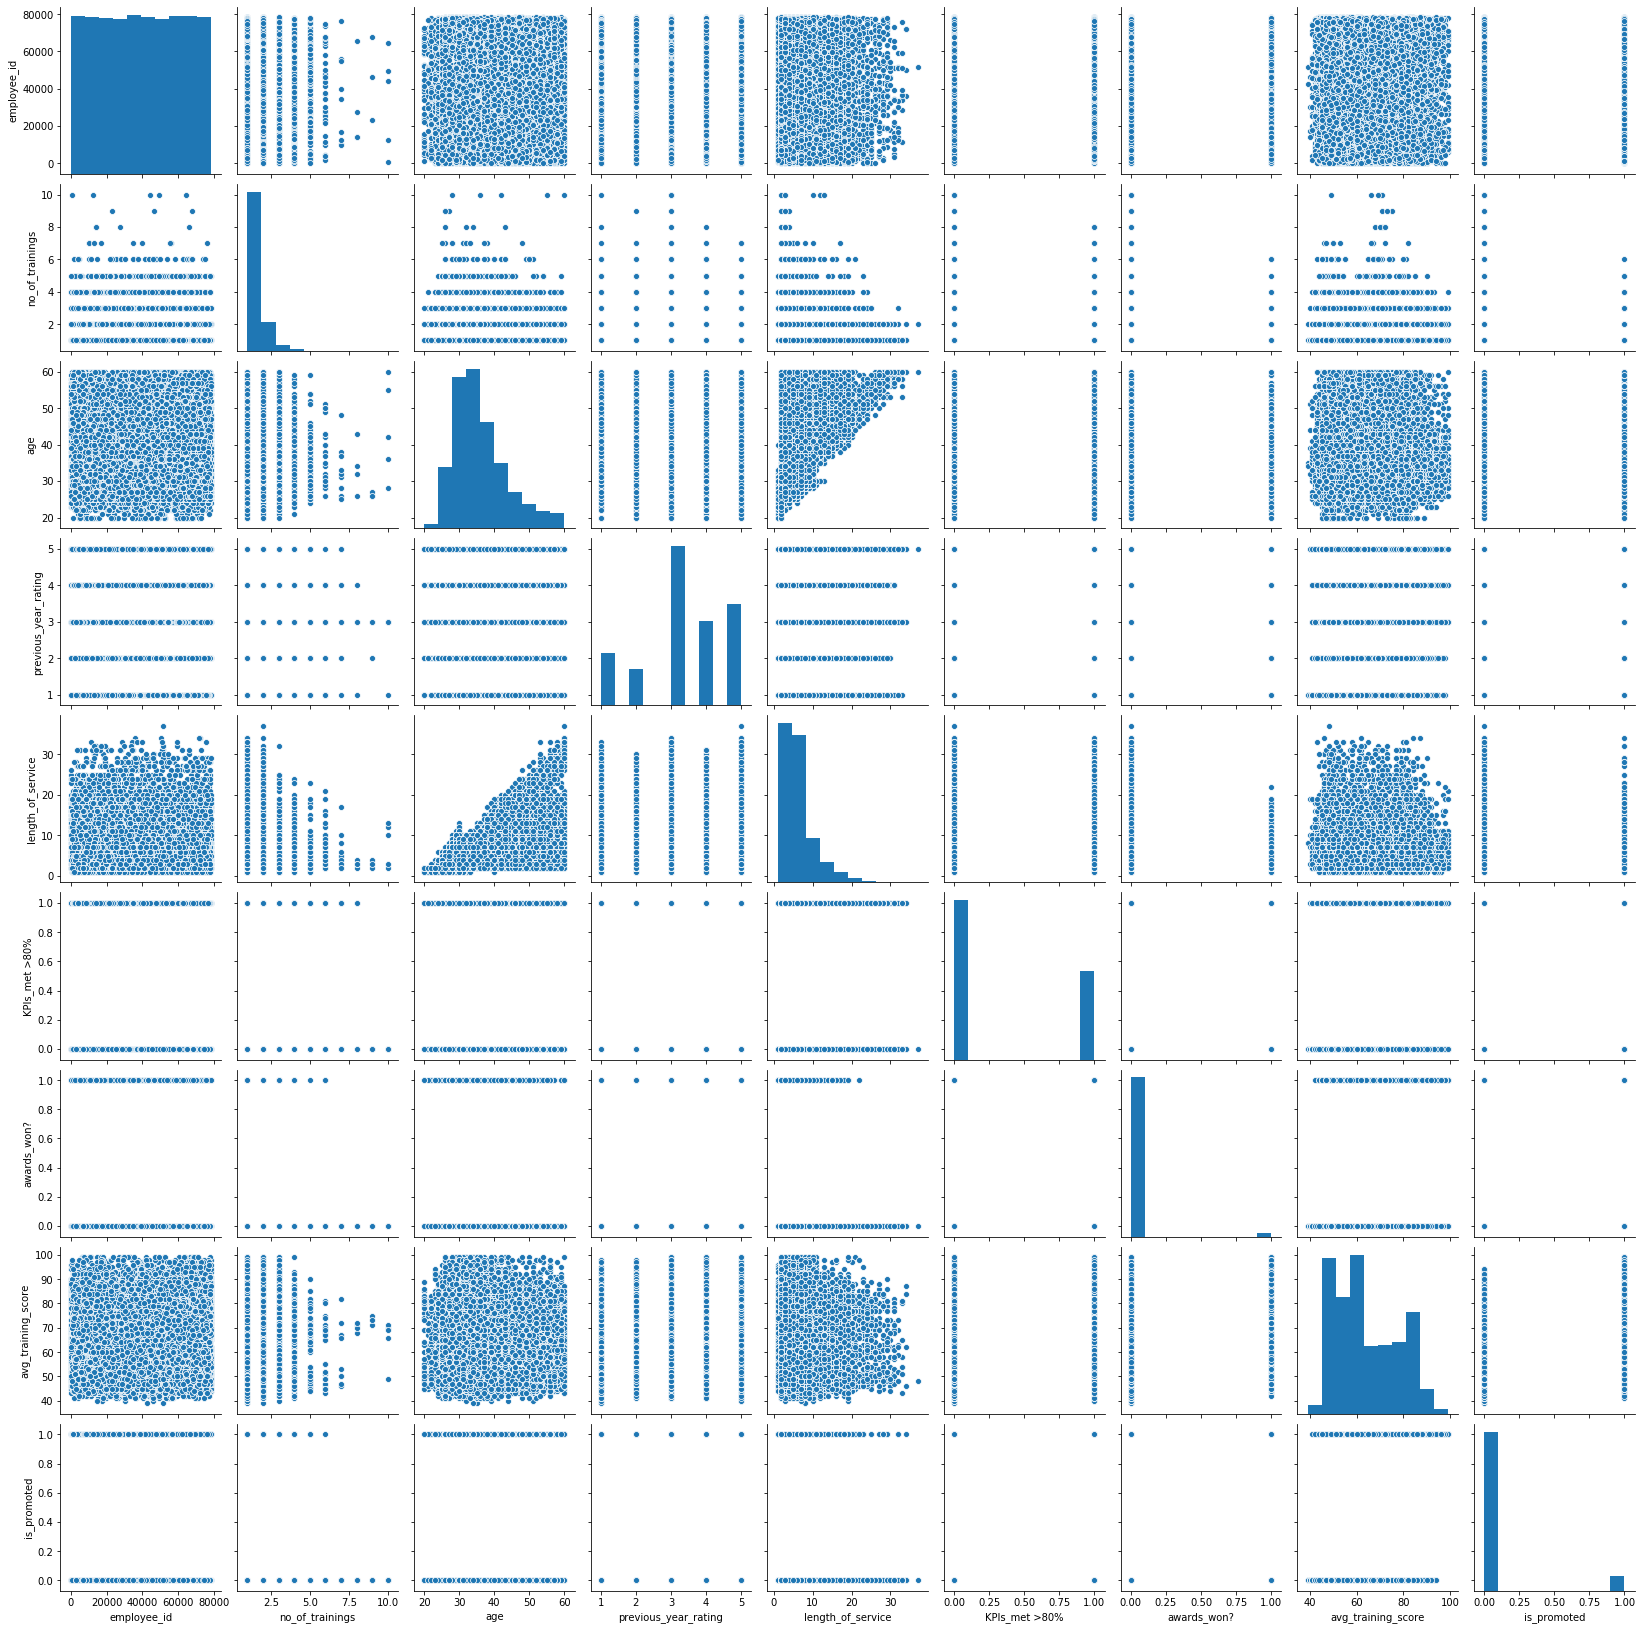

In [37]:
# We would look at how the various features are related to eachother.
sns.pairplot(df1)

* The relationship between the various features does not show any pattern. 
* The scatter plot between the variables are spread across and cannot make any inferences fro them.


#### We move on to look at the correlation between the various features using a heatmap.

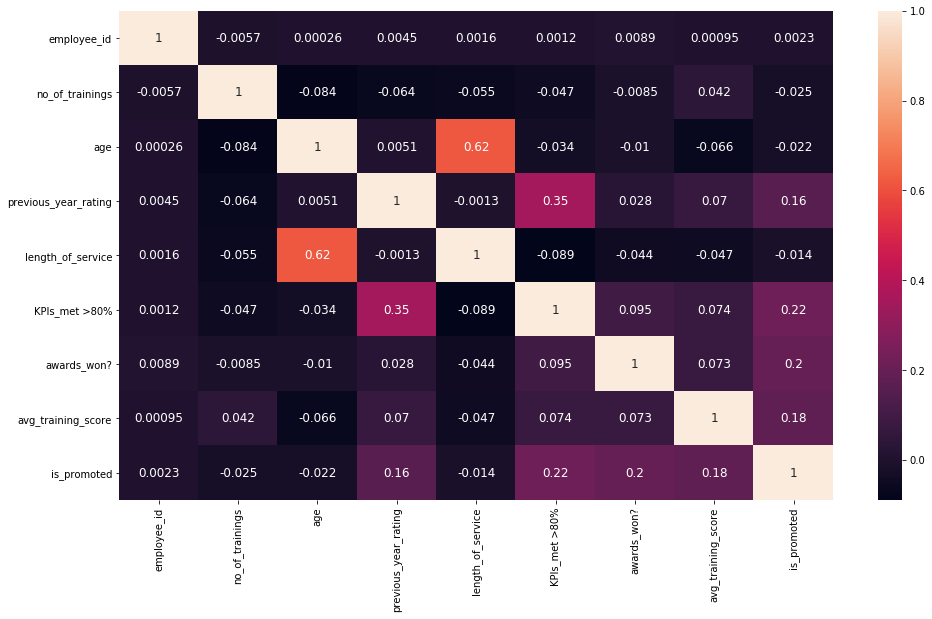

In [38]:
fig, ax = plt.subplots(figsize = (16, 9))
sns.heatmap(df1.corr(), annot = True, annot_kws={'size': 12})

In [40]:
df1.corr()

,employee_id,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
employee_id,1.000000,-0.005665,0.000260,0.004465,0.001644,0.001215,0.008883,0.000945,0.002306
no_of_trainings,-0.005665,1.000000,-0.083590,-0.064236,-0.055440,-0.046673,-0.008528,0.042033,-0.025006
age,0.000260,-0.083590,1.000000,0.005068,0.620348,-0.033886,-0.010335,-0.066214,-0.022412
previous_year_rating,0.004465,-0.064236,0.005068,1.000000,-0.001252,0.352434,0.027920,0.070041,0.158715
length_of_service,0.001644,-0.055440,0.620348,-0.001252,1.000000,-0.089081,-0.043750,-0.047461,-0.014267
KPIs_met >80%,0.001215,-0.046673,-0.033886,0.352434,-0.089081,1.000000,0.095208,0.074114,0.219933
awards_won?,0.008883,-0.008528,-0.010335,0.027920,-0.043750,0.095208,1.000000,0.073132,0.196971
avg_training_score,0.000945,0.042033,-0.066214,0.070041,-0.047461,0.074114,0.073132,1.000000,0.179494
is_promoted,0.002306,-0.025006,-0.022412,0.158715,-0.014267,0.219933,0.196971,0.179494,1.000000


* This shows us the correlation between the continuous variables and the label variable.
* The correlation between the continuous variables and the label variable are low.

#### Categorical to Promotion comparison

* We look at how the various categorical features are compared to the label value. 

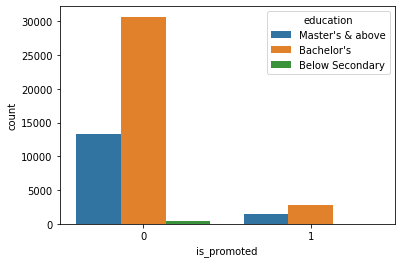

In [56]:
x = sns.countplot(x='is_promoted', hue='education', data=df1)

* From the graph, focusing on those who were promoted we could see that employees with Bachelor's have a higher promotion than the other classes.
* 

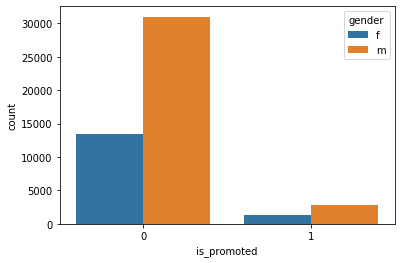

In [57]:
x = sns.countplot(x='is_promoted', hue='gender', data=df1)

* The graph above confirms our hypothesis that more males are promoted than females.

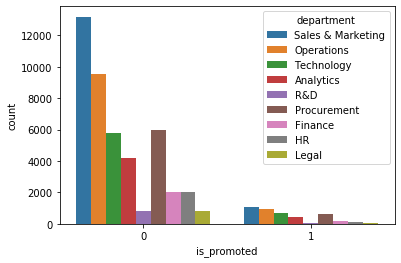

In [58]:
x = sns.countplot(x='is_promoted', hue='department', data=df1)

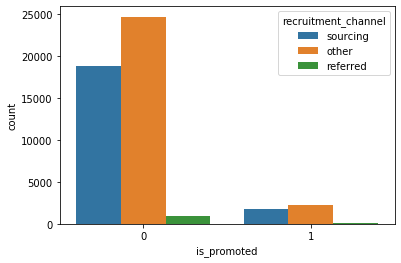

In [59]:
x = sns.countplot(x='is_promoted', hue='recruitment_channel', data=df1)

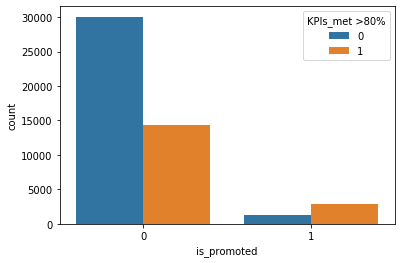

In [60]:
x = sns.countplot(x='is_promoted', hue='KPIs_met >80%', data=df1)